# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mpl #We'll use the matplotlib.colors library to color our data points
%matplotlib inline 

In [2]:
# Here we create a sample dataframe
df = pd.read_csv("oh_table.csv")
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [3]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
#sample_df["column 1"].loc[sample_df["column 2"] == 0]
pleiades = df["row_id"].loc[df["group_id"] == 0]
print(pleiades.head())

0     659
1    1559
2    1904
3    1929
4    1944
Name: row_id, dtype: int64


Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [4]:
G = df["G"].loc[df["group_id"] == 0]
print(G.head())

0    11.160
1     9.066
2    10.265
3     9.249
4    11.553
Name: G, dtype: float64


Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [5]:
J = df["J"].loc[df["group_id"] == 0]
#print(J)
distance = df["distance"].loc[df["group_id"]==0]
print(distance.head())

0    129.949
1    132.557
2    148.752
3    131.839
4    134.194
Name: distance, dtype: float64


#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [6]:
# You will need to import numpy
import numpy as np

In [7]:
# You can use this function in your code to find the log of distance:
absolute_mag = G - 5 * np.log10(distance) + 5
# np.log10()
color = G - J
absolute_mag.head()

0    5.591135
1    3.453987
2    4.402686
3    3.648780
4    5.914335
dtype: float64

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

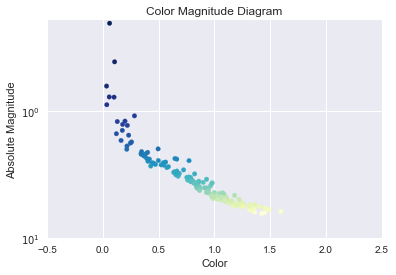

In [37]:
plt.clf()
cm = plt.cm.get_cmap("YlGnBu_r")
# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(color, absolute_mag , c=absolute_mag, s=20, cmap=cm ) 
# This plots all our points as a scatterplot
plt.yscale('log')
#plt.yticks(range(-10, 20, 5))
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.xlabel("Color")
plt.ylabel('Absolute Magnitude')
plt.title('Color Magnitude Diagram') 
plt.gca().invert_yaxis()
# This inverts the x axis so that the hottest stars are on the left.
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

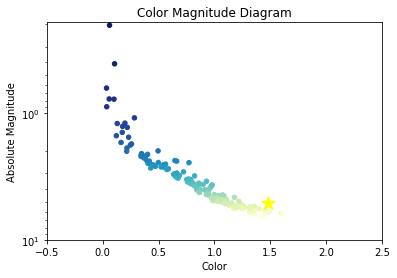

In [24]:
plt.clf()
cm = plt.cm.get_cmap("YlGnBu_r")
plt.scatter(color, absolute_mag , c=absolute_mag, s=20, cmap=cm ) 
plt.scatter(5.12 - 3.64, 5.12, c= "yellow", s=200, marker = "*")
plt.yscale('log')
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.xlabel("Color")
plt.ylabel('Absolute Magnitude')
plt.title('Color Magnitude Diagram') 
plt.gca().invert_yaxis()
# This inverts the x axis so that the hottest stars are on the left.


### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

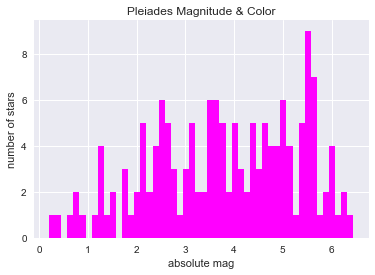

In [32]:
import seaborn; seaborn.set()
plt.hist(absolute_mag, 50, color = "magenta")
plt.title("Pleiades Magnitude & Color")
plt.xlabel("absolute mag")
plt.ylabel("number of stars")
plt.savefig("Pleiades Magnitude.png")
plt.show()

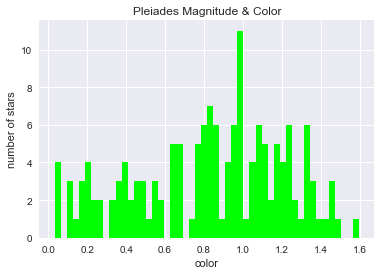

In [36]:
import seaborn; seaborn.set()
plt.hist(color, 50, color = "lime")
plt.title("Pleiades Magnitude & Color")
plt.xlabel("color")
plt.ylabel("number of stars")
plt.savefig("Pleiades color.png")
plt.show()